In [2]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [7]:
labels = os.listdir(r"D:/Backup - 1/Kalaiyarasi/Driver Drowsiness/train")


def get_data(dir_path=r"D:/Backup - 1/Kalaiyarasi/Driver Drowsiness/train", face_cas=r"D:/Backup - 1/Kalaiyarasi/Driver Drowsiness/Required_files/haarcascade_frontalface_default.xml", eye_cas=r"D:/Backup - 1/Kalaiyarasi/Driver Drowsiness/Required_files/haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

data_train = get_data()

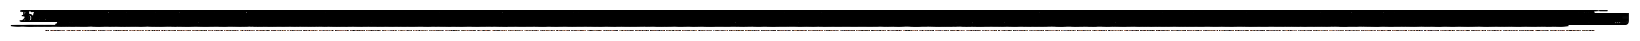

In [36]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Directory containing your images
image_dir = "D:/Backup - 1/Kalaiyarasi/Driver Drowsiness/train"

# List to store image file paths
image_paths = []

# Recursively search for image files in all subdirectories
for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):
            image_paths.append(os.path.join(root, file))

# Shuffle the list of image paths
random.shuffle(image_paths)

# Plot the images
fig, axs = plt.subplots(1, len(image_paths), figsize=(20, 20))
for i, image_path in enumerate(image_paths):
    img = Image.open(image_path)
    img = img.resize((100, 100))  # Resize the image if needed
    axs[i].imshow(img)
    axs[i].set_title(os.path.basename(image_path))  # Set the title to the filename
    axs[i].axis('off')  # Turn off axis labels
plt.show()



In [14]:
def append_data():
    data = data_train
    #print(data)
    return data

new_data = append_data()

In [15]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)


In [16]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

y = np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

len(X_test)


436

In [18]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)


train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [23]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(145,145,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

history = model.fit(train_generator, epochs=5, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))


model.save("drowiness_new6.h5")

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 244s 7s/step - accuracy: 0.4984 - loss: 0.0000e+00 - val_accuracy: 0.4885 - val_loss: 0.0000e+00
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 214s 7s/step - accuracy: 0.4906 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5


C:\Users\Admin\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 223s 7s/step - accuracy: 0.5214 - loss: 0.0000e+00 - val_accuracy: 0.4885 - val_loss: 0.0000e+00
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 209s 6s/step - accuracy: 0.5201 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 222s 7s/step - accuracy: 0.5094 - loss: 0.0000e+00 - val_accuracy: 0.4885 - val_loss: 0.0000e+00
